In [1]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from torch.utils.data import Dataset ,DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster, datasets
from sklearn.datasets import make_moons

%run functions2D-2.ipynb

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

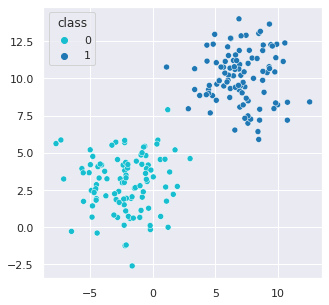

In [2]:
data = pd.read_csv("/users/kent/stadiset/Research Work/ReLU/Datasets/score.csv")
X = data.iloc[:,:-1].values
# print(X)
Y = data.iloc[:,-1].values 
x0,y0 = seperatePoints1(X)
# plt.scatter(X[:, 0][Y==1],X[:, 1][Y==1], color='b',s=10)
# plt.scatter(X[:, 0][Y==0],X[:, 1][Y==0], color='orange',s = 10)
palette = {0:"tab:cyan",
           1:"tab:blue", 
           }
sns.set(rc = {'figure.figsize':(5,5)})
sns.scatterplot(x0,y0, hue = data['class'], palette=palette )

In [3]:
weights1 = np.array(([0.1532, -0.4506],
                     [-0.2035, -0.2523]))

weights2 = np.array(([ 0.3024,  0.1265],
                     [-0.5793,  2.8742]))

weights3 = np.array(([0.4654, -2.8651]))

bias1 = np.array(([-0.0394,  
                   2.9368]))

bias2 = np.array(([-4.3833e-01, 
                   -4.1123e-05]))

bias3 = np.array(([5.3234]))

In [4]:
W1 = matrix_from_weights(weights1, bias1)
W2 = matrix_from_weights(weights2, bias2)
W1_ = np.linalg.inv(W1)
W2_ = np.linalg.inv(W2)
W21 = W2.dot(W1)
W21_ = np.linalg.inv(W21)
W3 = np.array(([0.4654, -2.8651, 5.3234],
              [0,0,1]))
W31 = W3.dot(W21)
startl1 = (W1_[[0,1],2]) #origin

# Layer-1

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

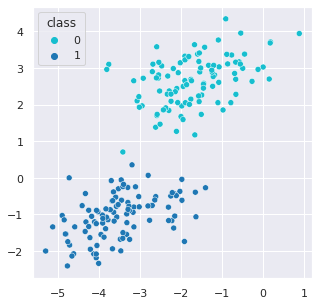

In [5]:
#transform the original data

t1 = applyWeights_on_original(W1,X)

#get points
x1,y1 = seperatePoints(t1)


#Apply ReLU
x1r = applyRelu(x1)
y1r = applyRelu(y1)

palette2 = {0:"tab:orange",
           1:"tab:gray", 
           }
sns.set(rc = {'figure.figsize':(5,5)})
sns.scatterplot(x1,y1, hue = data['class'], palette = palette)


In [6]:
#view ReLU points

# sns.set(rc = {'figure.figsize':(5,5)})
# sns.scatterplot(x1r,y1r, hue = data['class'], palette = palette)

In [7]:
#coordinates in original space
t1f = makeList1(x1r,y1r)
t1reversed = applyWeightsInverse(W1, t1f)
x1o,y1o = seperatePoints(t1reversed)

t1r_set = makeList(x1o,y1o)
original_set = makeList(x0,y0)

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


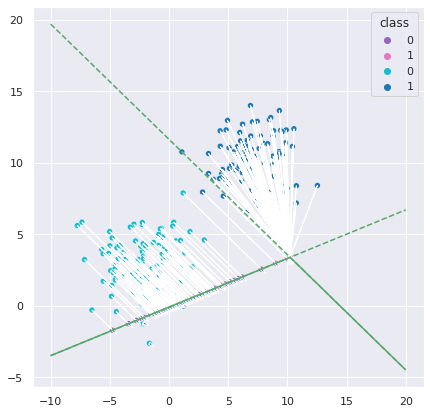

In [8]:
#first 2 hyperplanes
s = 10
ss = np.linspace(-s,20, 2000)
x11,y11 =Generate_Line([bias1[0],weights1[0][0],weights1[0][1]],ss)
x12,y12 = Generate_Line([bias1[1],weights1[1][0],weights1[1][1]],ss)

line1 = makeList1(x11,y11)
line2 = makeList1(x12,y12)

t11,f11 = check_pos_l1(W1,line1)
t12,f12 = check_pos_l1(W1,line2)
#solid and dotted lines
x11s, y11s = seperatePoints(t11)
x11d, y11d = seperatePoints(f11)
x12s, y12s = seperatePoints(t12)
x12d, y12d = seperatePoints(f12)

palette2 = {0:"tab:purple",
           1:"tab:pink", 
           }

sns.set(rc = {'figure.figsize':(7,7)})
sns.scatterplot(x1o,y1o, hue = data['class'], palette = palette2)
sns.scatterplot(x0,y0, hue = data['class'], palette = palette)
plt.plot(x11s, y11s, c ="g")
plt.plot(x11d, y11d, c ="g",linestyle = '--')
plt.plot(x12s, y12s, c ="g")
plt.plot(x12d, y12d, c ="g",linestyle = '--')
for i in range(len(original_set)):
        plt.arrow(original_set[i][0],original_set[i][1], t1r_set[i][0]-original_set[i][0],t1r_set[i][1]-original_set[i][1] , 
                  head_width=0.2, head_length=0.5)

# Layer-2

In [9]:
# t1f = makeList1(x1r,y1r)
t2 = applyWeights(W2,t1f) #apply on 1st layer relu'd points
#get points
x2,y2 = seperatePoints(t2)
#Apply ReLU
x2r = applyRelu(x2)
y2r = applyRelu(y2)
# sns.scatterplot(x2,y2, hue = data['class'], palette = palette)



weights21 = W2.dot(W1)
W21 = weights21
print(weights21)


#coordinates in original space
t2f = makeList1(x2r,y2r)


t2reversed = applyWeightsInverse(W21, t2f)
x2o,y2o = seperatePoints(t2reversed)
t2r_set = makeList(x2o,y2o)

#Layer 2 hyperplanes
s = 10
ss = np.linspace(-s,20, 2000)
x21,y21 = Generate_Line([weights21[0][2],weights21[0][0],weights21[0][1]],ss)
x22,y22 = Generate_Line([weights21[1][2],weights21[1][0],weights21[1][1]],ss)

line3 = makeList1(x21,y21)
line4 = makeList1(x22,y22)

def check_pos_previous(weights_matrix,data_ls):
    true = []
    false = []
    for i in data_ls:
        ls0 = applyWeights(weights_matrix,data_ls)
    for l,j in zip(data_ls,ls0):
        if ((j[0]>=0 and j[1]>=0) or (j[0]==0 and j[1]==0) or (j[0]>=0 and j[1]==0) or (j[1]>=0 and j[0]==0)):
            true.append(l)
        else:
            false.append(l)
    return true,false

def check_pos_current(weights_matrix,data_ls):
    true = []
    false = []
    for i in data_ls:
        ls0 = applyWeights(weights_matrix,data_ls)
    for l,j in zip(data_ls,ls0):
        if ((j[0]==0 and j[1]==0) or (j[0]>=0 and j[1]==0) or (j[1]>=0 and j[0]==0)):
            true.append(l)
        else:
            false.append(l)
    return true,false


t21,f21 = check_pos_previous(W1,line3)
t22,f22 = check_pos_previous(W1,line4)

tru21,fal21 = check_pos_current(W21,t21)
tru22,fal22 = check_pos_current(W21,t22)

#graph them
x21s, y21s = seperatePoints(tru21)
x21d, y21d = seperatePoints(fal21)
x22s, y22s = seperatePoints(tru22)
x22d, y22d = seperatePoints(fal22)


[[ 0.02058493 -0.16817739 -0.07873936]
 [-0.67364846 -0.46412808  8.46373386]
 [ 0.          0.          1.        ]]


/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

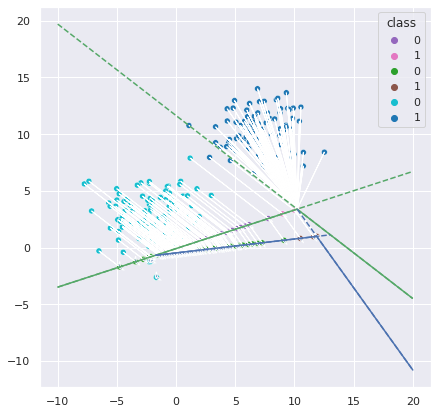

In [10]:
palette3 = {0:"tab:green",
           1:"tab:brown", 
           }
sns.set(rc = {'figure.figsize':(7,7)})
sns.scatterplot(x1o,y1o, hue = data['class'], palette = palette2)
sns.scatterplot(x2o,y2o, hue = data['class'], palette = palette3)
sns.scatterplot(x0,y0, hue = data['class'], palette = palette)


# plt.plot(x21, y21, c ="pink")
# plt.plot(x22, y22, c ="pink")

plt.plot(x11s, y11s, c ="g")
plt.plot(x11d, y11d, c ="g",linestyle = '--')
plt.plot(x12s, y12s, c ="g")
plt.plot(x12d, y12d, c ="g",linestyle = '--')

plt.plot(x21s, y21s, c ="b")
plt.plot(x21d, y21d, c ="b",linestyle = '--')
plt.plot(x22s, y22s, c ="b")
plt.plot(x22d, y22d, c ="b",linestyle = '--')
for i in range(len(original_set)):
        plt.arrow(original_set[i][0],original_set[i][1], t1r_set[i][0]-original_set[i][0],t1r_set[i][1]-original_set[i][1] , 
                  head_width=0.2, head_length=0.5)
for i in range(len(original_set)):
        plt.arrow(t1r_set[i][0],t1r_set[i][1], t2r_set[i][0]-t1r_set[i][0],t2r_set[i][1]-t1r_set[i][1] , 
                  head_width=0.2, head_length=0.5)

# Layer 3

In [11]:
print(W31)
weights31 = W31
s = 10
ss = np.linspace(-s,20, 2000)
x31,y31 = Generate_Line([weights31[0][2],weights31[0][0],weights31[0][1]],ss)

[[  1.93965043   1.2515036  -18.96268917]
 [  0.           0.           1.        ]]


In [12]:
line5 = makeList1(x31,y31)
t31,f31 = check_pos_previous(W1,line5)
t31,f31 = check_pos_previous(W21,t31)

x31s, y31s = seperatePoints(t31)
x31d, y31d = seperatePoints(f31)

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

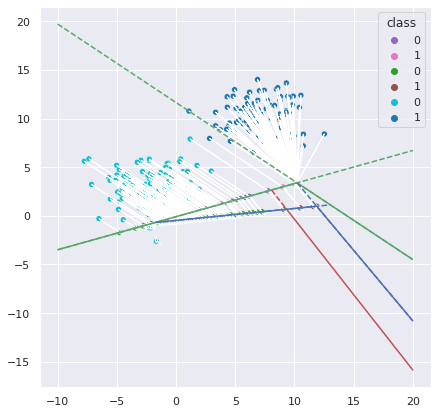

In [13]:
palette3 = {0:"tab:green",
           1:"tab:brown", 
           }
sns.set(rc = {'figure.figsize':(7,7)})
sns.scatterplot(x1o,y1o, hue = data['class'], palette = palette2)
sns.scatterplot(x2o,y2o, hue = data['class'], palette = palette3)
sns.scatterplot(x0,y0, hue = data['class'], palette = palette)


# plt.plot(x21, y21, c ="pink")
# plt.plot(x22, y22, c ="pink")

plt.plot(x11s, y11s, c ="g")
plt.plot(x11d, y11d, c ="g",linestyle = '--')
plt.plot(x12s, y12s, c ="g")
plt.plot(x12d, y12d, c ="g",linestyle = '--')

plt.plot(x21s, y21s, c ="b")
plt.plot(x21d, y21d, c ="b",linestyle = '--')
plt.plot(x22s, y22s, c ="b")
plt.plot(x22d, y22d, c ="b",linestyle = '--')

# plt.plot(x31, y31, c ="r")
plt.plot(x31s, y31s, c ="r")
plt.plot(x31d, y31d, c ="r",linestyle = '--')

for i in range(len(original_set)):
        plt.arrow(original_set[i][0],original_set[i][1], t1r_set[i][0]-original_set[i][0],t1r_set[i][1]-original_set[i][1] , 
                  head_width=0.2, head_length=0.5)
for i in range(len(original_set)):
        plt.arrow(t1r_set[i][0],t1r_set[i][1], t2r_set[i][0]-t1r_set[i][0],t2r_set[i][1]-t1r_set[i][1] , 
                  head_width=0.2, head_length=0.5)

[[ 0.1532 -0.4506 -0.0394]
 [-0.2035 -0.2523  2.9368]
 [ 0.      0.      1.    ]]
[[ 3.0240e-01  1.2650e-01 -4.3833e-01]
 [-5.7930e-01  2.8742e+00 -4.1123e-05]
 [ 0.0000e+00  0.0000e+00  1.0000e+00]]
[ 0.4654 -2.8651  5.3234]


/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

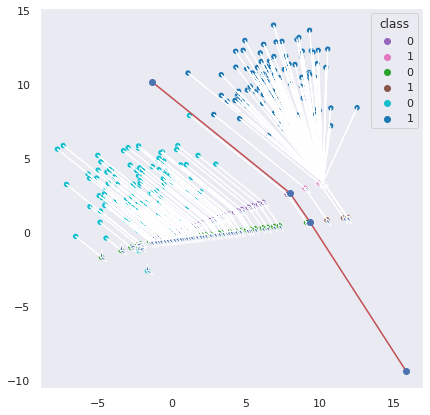

In [14]:
weights = [weights1, weights2, weights3]
bias = [bias1, bias2, bias3]

W = organize_input(weights, bias)

for w in W:
    print(w)
k = 50
n = 5000
I = [[-k, k], n]
sns.set(rc = {'figure.figsize':(7,7)})

fig, axs = plt.subplots(1,1)
axs.set_aspect('equal')
# axs.set_facecolor('xkcd:white')

# fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
# plt_ind_list = np.arange(3)+131
# ax.set_aspect('equal')


# draw_sectors(axs,matrix_list=W,   
#                 colors_list=['y', 'b', 'r'],   
#                 width_list=len(W)*[I],  
#                 height_list=len(W)*[I],  
#                 frame_shape=[[-10,10],[-10,10]],  
#                 remove_dotted_list=[False, False, True])

draw_polyline(axs, W, 12)

for i in range(len(original_set)):
        plt.arrow(original_set[i][0],original_set[i][1], t1r_set[i][0]-original_set[i][0],t1r_set[i][1]-original_set[i][1] , 
                  head_width=0.2, head_length=0.5)
for i in range(len(original_set)):
        plt.arrow(t1r_set[i][0],t1r_set[i][1], t2r_set[i][0]-t1r_set[i][0],t2r_set[i][1]-t1r_set[i][1] , 
                  head_width=0.2, head_length=0.5)
sns.scatterplot(x1o,y1o, hue = data['class'], palette = palette2)
sns.scatterplot(x2o,y2o, hue = data['class'], palette = palette3)
sns.scatterplot(x0,y0, hue = data['class'], palette = palette)


plt.grid()
plt.show()